In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#  Import and read the Metro_Interstate_Traffic_Volume.csv.
Traffic_analysis_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
Traffic_analysis_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [16]:
## Michael added
## check number of categories in weather_main
Traffic_analysis_df['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [19]:
## Michael added
## get weather_description counts
Traffic_analysis_df['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

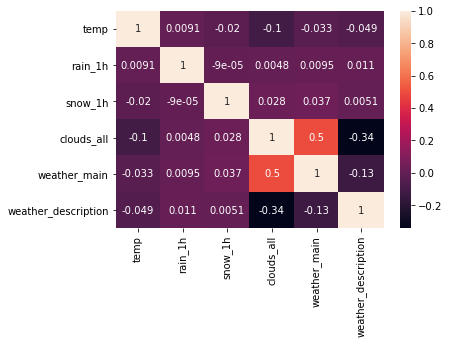

In [28]:
## Michael added
## use correlation matrix to see if weather_description is just describing clouds_all, rain_1h, snow_1h
weather_cols_df = Traffic_analysis_df.iloc[:,1:7]

# create LabelEncoder instance
le = LabelEncoder()
# encode categorical columns
weather_cols_df['weather_main'] = le.fit_transform(weather_cols_df['weather_main'])
weather_cols_df['weather_description'] = le.fit_transform(weather_cols_df['weather_description'])
# create correlation matrix
correlation_matrix = weather_cols_df.corr()

# create heatmap of matrix
sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [9]:
# Drop the non-beneficial ID columns, 'weather_main' and 'weather_description'.
Traffic_analysis_df = Traffic_analysis_df.drop(['weather_main','weather_description'], axis=1)
Traffic_analysis_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,10/2/2012 9:00,5545
1,None,289.36,0.0,0.0,75,10/2/2012 10:00,4516
2,None,289.58,0.0,0.0,90,10/2/2012 11:00,4767
3,None,290.13,0.0,0.0,90,10/2/2012 12:00,5026
4,None,291.14,0.0,0.0,75,10/2/2012 13:00,4918


In [10]:
# Determine the number of unique values in each column.
Traffic_analysis_df.nunique()

holiday              12
temp               5843
rain_1h             372
snow_1h              12
clouds_all           60
date_time         40575
traffic_volume     6704
dtype: int64

In [11]:
Traffic_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   date_time       48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.6+ MB


In [12]:
import datetime as dt
import calendar 

# convert the 'date_time' column to datetime format
Traffic_analysis_df['date_time']= pd.to_datetime(Traffic_analysis_df['date_time'])
 
# Check the format of 'date_time' column
Traffic_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   holiday         48204 non-null  object        
 1   temp            48204 non-null  float64       
 2   rain_1h         48204 non-null  float64       
 3   snow_1h         48204 non-null  float64       
 4   clouds_all      48204 non-null  int64         
 5   date_time       48204 non-null  datetime64[ns]
 6   traffic_volume  48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.6+ MB


In [14]:
Traffic_analysis_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918


In [15]:
Traffic_analysis_features = Traffic_analysis_df.copy()

In [16]:
#Extracting features from date_time variable
Traffic_analysis_features['date_time'] = pd.to_datetime(Traffic_analysis_features.date_time)
Traffic_analysis_features['weekday'] = Traffic_analysis_features.date_time.dt.weekday
Traffic_analysis_features['date'] = Traffic_analysis_features.date_time.dt.date
Traffic_analysis_features['hour'] = Traffic_analysis_features.date_time.dt.hour
Traffic_analysis_features['month'] = Traffic_analysis_features.date_time.dt.month
Traffic_analysis_features['year'] = Traffic_analysis_features.date_time.dt.year
#Monday is 0 and Sunday is 6

In [17]:
Traffic_analysis_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [18]:
# Generate our categorical variable lists
application_cat = Traffic_analysis_df.dtypes[Traffic_analysis_df.dtypes=='object'].index.tolist()
application_cat

['holiday']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Traffic_analysis_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
Traffic_analysis_df = Traffic_analysis_df.merge(encode_df,left_index=True, right_index=True)
Traffic_analysis_df = Traffic_analysis_df.drop(application_cat,1)
Traffic_analysis_df.head()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
Traffic_analysis_df['temp'] = (Traffic_analysis_df['temp']-273.15)
Traffic_analysis_df.head()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,15.13,0.0,0.0,40,2012-10-02 09:00:00,5545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,16.21,0.0,0.0,75,2012-10-02 10:00:00,4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,16.43,0.0,0.0,90,2012-10-02 11:00:00,4767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16.98,0.0,0.0,90,2012-10-02 12:00:00,5026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,17.99,0.0,0.0,75,2012-10-02 13:00:00,4918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
#  Import and read the 2014-2020_AllUserData_4Website.xlsx.
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

bike_df = pd.read_excel('2014-2020_AllUserData_4Website.xlsx')

bike_df.head()


,site,agency,lat,long,city,county,mndot_district,mode,date_day,doy,...,imputed,total_yearly_imputed_days,facility_type,on/off_road,install_year,trunk_hwy,us_bikeroute,device,direction,technology
0,Brown's Creek ST - Stillwater,MnDNR,45.064023,-92.805888,Stillwater,Washington,M,Bicyclist,2018-01-02,2,...,True,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
1,Brown's Creek ST - Stillwater,MnDNR,45.064023,-92.805888,Stillwater,Washington,M,Bicyclist,2018-01-03,3,...,True,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
2,Brown's Creek ST - Stillwater,MnDNR,45.064023,-92.805888,Stillwater,Washington,M,Bicyclist,2018-01-04,4,...,True,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
3,Brown's Creek ST - Stillwater,MnDNR,45.064023,-92.805888,Stillwater,Washington,M,Bicyclist,2018-01-05,5,...,True,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
4,Brown's Creek ST - Stillwater,MnDNR,45.064023,-92.805888,Stillwater,Washington,M,Bicyclist,2018-01-06,6,...,True,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops


In [32]:
# Drop the non-beneficial ID columns, 'site','agency','lat','long','city','mndot_district','mode','doy','imputed''.
bike_df = bike_df.drop(['site','agency','lat','long','city','mndot_district','mode','doy','imputed',], axis=1)
bike_df.head()

,county,date_day,total,PRCP,TMAX,total_yearly_imputed_days,facility_type,on/off_road,install_year,trunk_hwy,us_bikeroute,device,direction,technology
0,Washington,2018-01-02,21.586591,0.0,15.0,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
1,Washington,2018-01-03,17.323078,0.0,11.0,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
2,Washington,2018-01-04,12.813717,0.0,2.0,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
3,Washington,2018-01-05,13.651215,0.0,3.0,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops
4,Washington,2018-01-06,21.927954,0.0,14.0,256,Shared Use Path,Off,2018,No,None,Eco-Multi,North/South,Infra-red & Inductive loops


In [33]:
bike_df = bike_df.drop(['PRCP','TMAX','total_yearly_imputed_days','facility_type','on/off_road','install_year','trunk_hwy',
                        'us_bikeroute','device','direction','technology'], axis=1)
bike_df.head()

,county,date_day,total
0,Washington,2018-01-02,21.586591
1,Washington,2018-01-03,17.323078
2,Washington,2018-01-04,12.813717
3,Washington,2018-01-05,13.651215
4,Washington,2018-01-06,21.927954


In [34]:
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78430 entries, 0 to 78429
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   county    78430 non-null  object        
 1   date_day  78430 non-null  datetime64[ns]
 2   total     78430 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ MB


In [16]:
# Split our preprocessed data into our features and target arrays
y = Traffic_analysis_df["traffic_volume"].values
X = Traffic_analysis_df.drop(["traffic_volume"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  ?
# hidden_nodes_layer2 = ?

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

SyntaxError: invalid syntax (<ipython-input-15-ba988e4bb80d>, line 3)